In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset:  brain.csv

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to
to the Size of the Head", Biometrika, Vol. 4, pp105-123

Description: Brain weight (grams) and head size (cubic cm) for 237
adults classified by gender and age group.

Variables/Columns
GENDER: Gender  /*1=Male, 2=Female*/
AGE: Age Range  /*1=20-46, 2=46+*/
SIZE: Head size (cm^3)  21-24
WEIGHT: Brain weight (grams)  29-32



* In this activity, you will calculate a regression line to predict head size vs. brain weight.

## Instructions

* Start by creating a scatter plot of the data to visually see if any linear trend exists.

* Split the data into training and testing using sklearn's `train_test_split` function.

* Next, use sklearn's linear regression model and fit the model to the training data.

* Use the test data to make new predictions. Calculate the MSE and R2 score for those predictions.

* Use `model.score` to calculate the R2 score for the test data.

In [6]:
# Step 1: Read in the csv file to get the data via pandas

brains = pd.read_csv("resources/brain.csv")
brains.head()

,gender,age,size,weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [7]:
# Step 2: Assign your X and y
# X is weight because it is the observable trait that we control. y is the size because that is the output we are
# trying to solve: Does weight affect the size of the brain?

# Always reshape the values as a two dimensional array
X, y = brains["weight"].values.reshape(-1, 1), brains["size"].values.reshape(-1, 1)

print(X.shape, y.shape)
# As long as there is a value after the comma, you know it is a 2d array

(237, 1) (237, 1)


Text(0, 0.5, 'Brain Size')

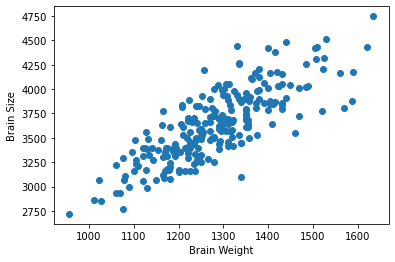

In [8]:
# Step 3: Plot the data to see if a linear regression exists

plt.scatter(X, y)
plt.xlabel("Brain Weight")
plt.ylabel("Brain Size")

### Judging by the shape of the scatterplot, we can assume that the data has a linear regression trend

In [9]:
# Step 4: Split the data into test and training data using sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# By printing out the data (X) and printing the training data (X_train, y_train) we can see the new training set.

print(X.shape)
print(X_train.shape, y_train.shape)

(237, 1)
(177, 1) (177, 1)


In [12]:
# Step 5: Create the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [13]:
# Step 6: Fit (train) the model using the training data (X_train, y_train)

model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Step 7: Quantify the model by finding the error
# finding the MSE and/or R2 score will be used for the test data
# Remember that predictions will use X_test and MSE and R2 will use y_test and predicted

from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X_test)

mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print("Mean Squared Error: {}".format(mse))
print("R Squared Score: {}".format(r2))

Mean Squared Error: 51228.19330570998
R Squared Score: 0.6568088729208812


In [15]:
# Step 8: Optional - use another method to get the R2

model.score(X_test, y_test)

0.6568088729208812

### Results: After training the Univariate Model, we find that the model is 65.7% accurate.